# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
cols = ["Sex","Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]
df=pd.read_csv("abalone.data",header=None,names=cols)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 277.4+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
#df=df.drop(["Sex"],axis=1)

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


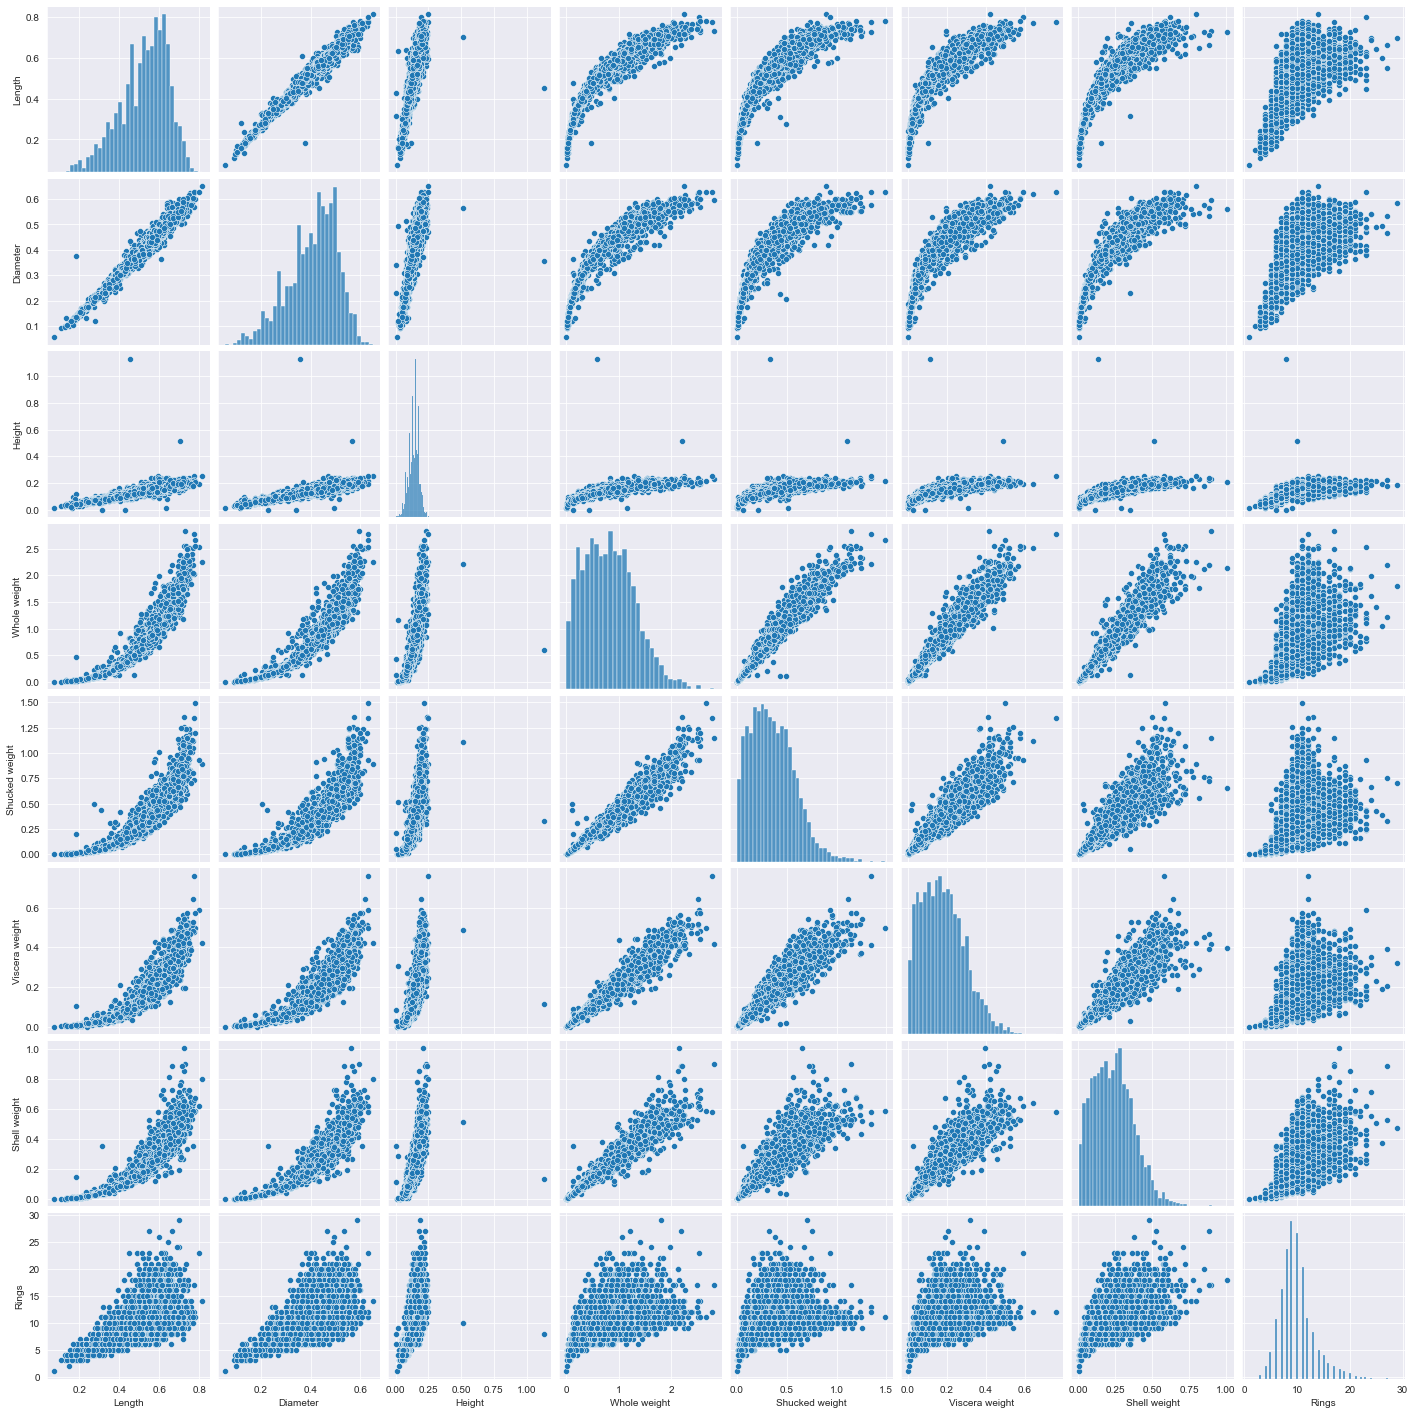

In [7]:
sns.pairplot(df)

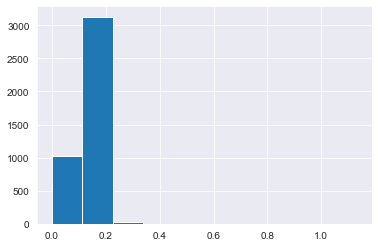

In [15]:
plt.hist(df["Height"])
plt.show()

<AxesSubplot:xlabel='Height'>

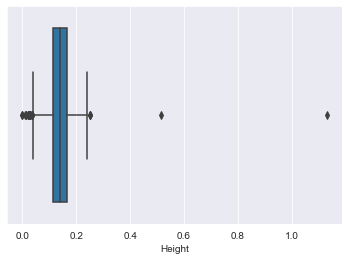

In [16]:
sns.boxplot(df["Height"])

In [22]:
df[df["Height"] > 0.4]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1417,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2051,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8


In [24]:
df=df.drop([1417,2051],axis=0)

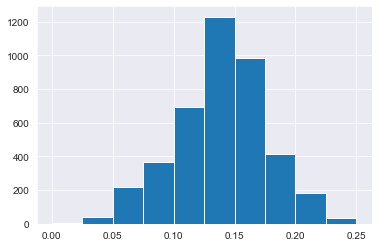

In [25]:
plt.hist(df["Height"])
plt.show()

<AxesSubplot:xlabel='Height'>

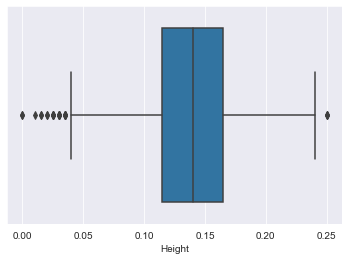

In [26]:
sns.boxplot(df["Height"])

In [27]:
x=df.values

In [28]:
x

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

## Kmeans clustering

In [32]:
from sklearn.cluster import KMeans

In [33]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

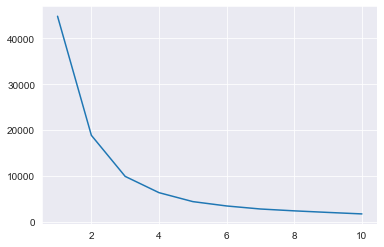

In [34]:
plt.plot(range(1,11),wcss)
plt.grid(True)
plt.show

In [35]:
kmeans = KMeans(n_clusters=3, random_state=1)
ykmeans = kmeans.fit_predict(x)


In [36]:
ykmeans[:50]

array([1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2,
       2, 2, 0, 2, 2, 0])

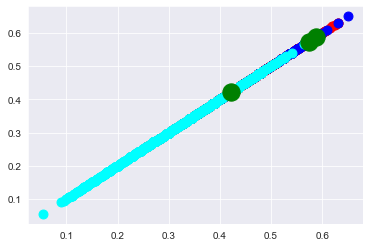

In [39]:
plt.scatter(x[ykmeans==0,1],x[ykmeans==0,1],s=80,c="red",label="cluster1")
plt.scatter(x[ykmeans==1,1],x[ykmeans==1,1],s=80,c="blue",label="cluster2")
plt.scatter(x[ykmeans==2,1],x[ykmeans==2,1],s=80,c="cyan",label="cluster3")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0],s=300,c="green")
plt.show()

### There are three clusters formed by Kmeans Clustering, Hence there should be three classes present in Sex target variable

In [45]:
pd.DataFrame(x[ykmeans])

,0,1,2,3,4,5,6,7
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7.0
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9.0
2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
4,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9.0
...,...,...,...,...,...,...,...,...
4170,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
4171,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
4172,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
4173,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
